In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Weatherlink_UMIT_SNDTWU_6-30-23_12-00_AM.csv', encoding="ISO-8859-1")

In [ ]:
df.head()

,Weatherlink UMIT SNDTWU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,6/30/23 12:00 AM : 1 Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU,weather link UMIT SNDTWU
2,NaN,Inside Temp/Hum,Inside Temp/Hum,Inside Temp/Hum,Inside Temp/Hum,Inside Temp/Hum,Inside Temp/Hum,Inside Temp/Hum,Inside Temp/Hum,Barometer,...,"Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati...","Vantage Pro2 Plus, includes UV & Solar Radiati..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - in Hg,...,Rain - in,High Rain Rate - in/h,Solar Rad - W/m^2,High Solar Rad - W/m^2,ET - in,UV Index,High UV Index,UV Dose - MEDs,Heating Degree Days,Cooling Degree Days


# Data Preprocessing


In [ ]:
# delete first 4 rows
df = df.drop(index=[0, 1, 2, 3])
df.head()

,Weatherlink UMIT SNDTWU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
4,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - in Hg,...,Rain - in,High Rain Rate - in/h,Solar Rad - W/m^2,High Solar Rad - W/m^2,ET - in,UV Index,High UV Index,UV Dose - MEDs,Heating Degree Days,Cooling Degree Days
5,6/30/23 12:00 AM,31,31,30,71,71,71,25,37,29.67,...,0,0.14,0,0,0,0,0,0,0,0.027
6,6/30/23 12:05 AM,31,31,31,70,71,70,25,36,29.67,...,0,0.06,0,0,--,0,0,0,0,0.028
7,6/30/23 12:10 AM,31,31,31,71,71,70,25,36,29.67,...,0,0.04,0,0,--,0,0,0,0,0.028
8,6/30/23 12:15 AM,31,31,30,71,71,70,25,37,29.67,...,0,0,0,0,--,0,0,0,0,0.028


In [ ]:
# sorting the first column
df.reset_index(drop=True, inplace=True)
df.head()

,Weatherlink UMIT SNDTWU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - in Hg,...,Rain - in,High Rain Rate - in/h,Solar Rad - W/m^2,High Solar Rad - W/m^2,ET - in,UV Index,High UV Index,UV Dose - MEDs,Heating Degree Days,Cooling Degree Days
1,6/30/23 12:00 AM,31,31,30,71,71,71,25,37,29.67,...,0,0.14,0,0,0,0,0,0,0,0.027
2,6/30/23 12:05 AM,31,31,31,70,71,70,25,36,29.67,...,0,0.06,0,0,--,0,0,0,0,0.028
3,6/30/23 12:10 AM,31,31,31,71,71,70,25,36,29.67,...,0,0.04,0,0,--,0,0,0,0,0.028
4,6/30/23 12:15 AM,31,31,30,71,71,70,25,37,29.67,...,0,0,0,0,--,0,0,0,0,0.028


In [ ]:
# Set the first row as column headers
df.columns = df.iloc[0]
df.head()

,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - in Hg,...,Rain - in,High Rain Rate - in/h,Solar Rad - W/m^2,High Solar Rad - W/m^2,ET - in,UV Index,High UV Index,UV Dose - MEDs,Heating Degree Days,Cooling Degree Days
0,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - in Hg,...,Rain - in,High Rain Rate - in/h,Solar Rad - W/m^2,High Solar Rad - W/m^2,ET - in,UV Index,High UV Index,UV Dose - MEDs,Heating Degree Days,Cooling Degree Days
1,6/30/23 12:00 AM,31,31,30,71,71,71,25,37,29.67,...,0,0.14,0,0,0,0,0,0,0,0.027
2,6/30/23 12:05 AM,31,31,31,70,71,70,25,36,29.67,...,0,0.06,0,0,--,0,0,0,0,0.028
3,6/30/23 12:10 AM,31,31,31,71,71,70,25,36,29.67,...,0,0.04,0,0,--,0,0,0,0,0.028
4,6/30/23 12:15 AM,31,31,30,71,71,70,25,37,29.67,...,0,0,0,0,--,0,0,0,0,0.028


In [ ]:
# Remove the first row from the DataFrame
df = df[1:]
df.head()

,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - in Hg,...,Rain - in,High Rain Rate - in/h,Solar Rad - W/m^2,High Solar Rad - W/m^2,ET - in,UV Index,High UV Index,UV Dose - MEDs,Heating Degree Days,Cooling Degree Days
1,6/30/23 12:00 AM,31,31,30,71,71,71,25,37,29.67,...,0,0.14,0,0,0,0,0,0,0,0.027
2,6/30/23 12:05 AM,31,31,31,70,71,70,25,36,29.67,...,0,0.06,0,0,--,0,0,0,0,0.028
3,6/30/23 12:10 AM,31,31,31,71,71,70,25,36,29.67,...,0,0.04,0,0,--,0,0,0,0,0.028
4,6/30/23 12:15 AM,31,31,30,71,71,70,25,37,29.67,...,0,0,0,0,--,0,0,0,0,0.028
5,6/30/23 12:20 AM,31,31,30,70,71,70,25,36,29.67,...,0,0,0,0,--,0,0,0,0,0.028


In [ ]:
# deleting the unnecessary columns from the dataset
df = df.drop(df.columns[[ 1,2,3,4,5,6,7,8,10,11,14,15,17,18,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,44,45,46,47,48,49]], axis=1)


In [ ]:
df.head()

,Date & Time,Barometer - in Hg,Absolute Pressure - in Hg,Temp - °C,Hum - %,Dew Point - °C,Avg Wind Speed - km/h,High Rain Rate - in/h,Solar Rad - W/m^2
1,6/30/23 12:00 AM,29.67,29.66,26,87,24,17,0.14,0
2,6/30/23 12:05 AM,29.67,29.65,26,86,24,16,0.06,0
3,6/30/23 12:10 AM,29.67,29.66,26,86,24,9,0.04,0
4,6/30/23 12:15 AM,29.67,29.66,26,87,24,13,0,0
5,6/30/23 12:20 AM,29.67,29.65,26,87,24,11,0,0


# The final data

In [ ]:
df

,Date & Time,Barometer - in Hg,Absolute Pressure - in Hg,Temp - °C,Hum - %,Dew Point - °C,Avg Wind Speed - km/h,High Rain Rate - in/h,Solar Rad - W/m^2
1,6/30/23 12:00 AM,29.67,29.66,26,87,24,17,0.14,0
2,6/30/23 12:05 AM,29.67,29.65,26,86,24,16,0.06,0
3,6/30/23 12:10 AM,29.67,29.66,26,86,24,9,0.04,0
4,6/30/23 12:15 AM,29.67,29.66,26,87,24,13,0,0
5,6/30/23 12:20 AM,29.67,29.65,26,87,24,11,0,0
...,...,...,...,...,...,...,...,...,...
2013,07-06-2023 23:40,29.58,29.56,26,91,25,16,0.05,0
2014,07-06-2023 23:45,29.58,29.57,26,91,25,17,0.04,0
2015,07-06-2023 23:50,29.58,29.57,26,91,25,12,2.7,0
2016,07-06-2023 23:55,29.58,29.57,26,91,25,21,0.47,0


# Exploring the Final Dataset

In [ ]:
print('The shape of our features is:', df.shape)

The shape of our features is: (2017, 9)


In [ ]:
df.describe()

,Date & Time,Barometer - in Hg,Absolute Pressure - in Hg,Temp - °C,Hum - %,Dew Point - °C,Avg Wind Speed - km/h,High Rain Rate - in/h,Solar Rad - W/m^2
count,2017,2017,2017,2017,2017,2017,2017,2017,2017
unique,2017,29,29,6,15,5,27,201,375
top,07-07-2023 00:00,29.61,29.52,27,92,25,8,0,0
freq,1,163,128,679,260,1029,189,1254,966


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 1 to 2017
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date & Time                2017 non-null   object
 1   Barometer - in Hg          2017 non-null   object
 2   Absolute Pressure - in Hg  2017 non-null   object
 3   Temp - °C                  2017 non-null   object
 4   Hum - %                    2017 non-null   object
 5   Dew Point - °C             2017 non-null   object
 6   Avg Wind Speed - km/h      2017 non-null   object
 7   High Rain Rate - in/h      2017 non-null   object
 8   Solar Rad - W/m^2          2017 non-null   object
dtypes: object(9)
memory usage: 141.9+ KB


In [ ]:
# Converting object dataframes into numeric
df[['Barometer - in Hg', 'Absolute Pressure - in Hg', 'Temp - °C', 'Hum - %', 'Dew Point - °C', 'Avg Wind Speed - km/h', 'High Rain Rate - in/h', 'Solar Rad - W/m^2']] = df[['Barometer - in Hg', 'Absolute Pressure - in Hg', 'Temp - °C', 'Hum - %', 'Dew Point - °C', 'Avg Wind Speed - km/h', 'High Rain Rate - in/h', 'Solar Rad - W/m^2']].apply(pd.to_numeric, errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 1 to 2017
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date & Time                2017 non-null   object 
 1   Barometer - in Hg          2017 non-null   float64
 2   Absolute Pressure - in Hg  2017 non-null   float64
 3   Temp - °C                  2017 non-null   int64  
 4   Hum - %                    2017 non-null   int64  
 5   Dew Point - °C             2017 non-null   int64  
 6   Avg Wind Speed - km/h      2017 non-null   int64  
 7   High Rain Rate - in/h      2017 non-null   float64
 8   Solar Rad - W/m^2          2017 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 141.9+ KB


In [ ]:
# Checking for missing values
missing_data = df.isnull().sum()
print(missing_data)

0
Date & Time                  0
Barometer - in Hg            0
Absolute Pressure - in Hg    0
Temp - °C                    0
Hum - %                      0
Dew Point - °C               0
Avg Wind Speed - km/h        0
High Rain Rate - in/h        0
Solar Rad - W/m^2            0
dtype: int64


# Quick Analysis of weather

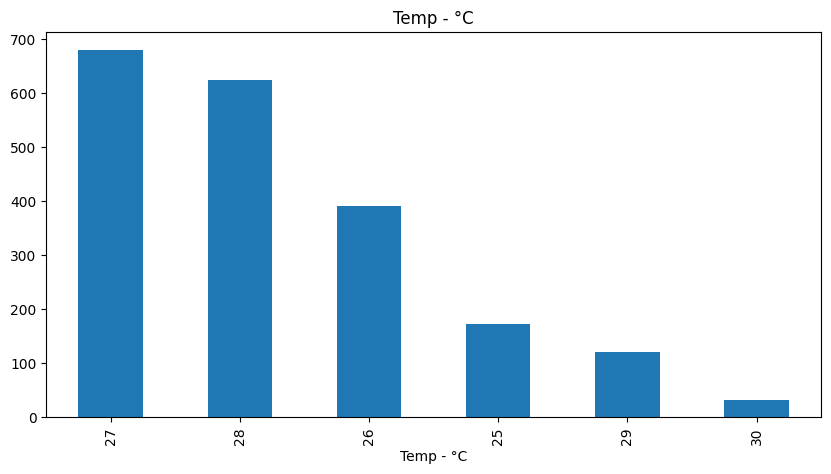

In [ ]:
plt.figure(figsize=(10,5))
df['Temp - °C'].value_counts().head(15).plot(kind='bar')

plt.title('Temp - °C')
plt.show()

<ipython-input-20-8ee6976c718c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temp - °C'],bins=[i for i in range(0,61,5)], kde=False)


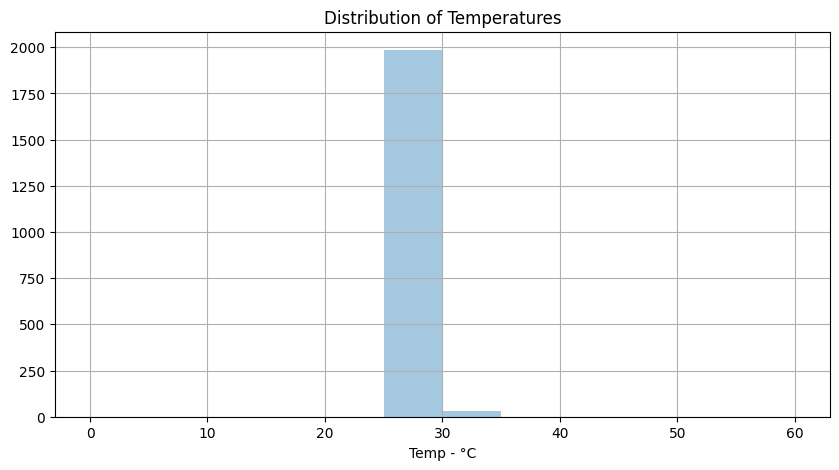

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Temp - °C'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

# Most common temperature scale is from 25 to 30 degree.

<Axes: >

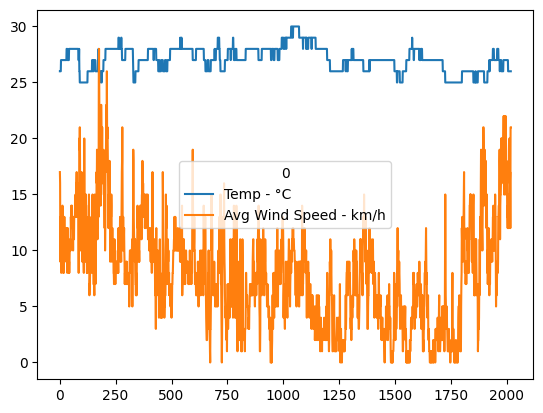

In [ ]:
df[['Temp - °C',  'Avg Wind Speed - km/h']].plot()

# This shows that these features has no gap in between i.e we are not missing any data


<Axes: >

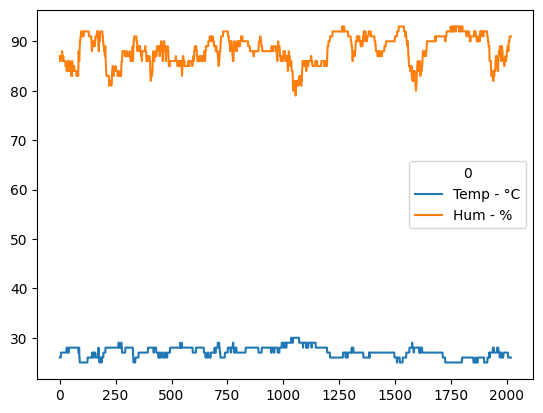

In [ ]:
df[['Temp - °C', 'Hum - %']].plot()

In [ ]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

<ipython-input-23-afea1c111a78>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date & Time'] = pd.to_datetime(df['Date & Time'])


In [ ]:
df['Date & Time']

1      2023-06-30 00:00:00
2      2023-06-30 00:05:00
3      2023-06-30 00:10:00
4      2023-06-30 00:15:00
5      2023-06-30 00:20:00
               ...        
2013   2023-07-06 23:40:00
2014   2023-07-06 23:45:00
2015   2023-07-06 23:50:00
2016   2023-07-06 23:55:00
2017   2023-07-07 00:00:00
Name: Date & Time, Length: 2017, dtype: datetime64[ns]

In [ ]:
df.isna().sum()

0
Date & Time                  0
Barometer - in Hg            0
Absolute Pressure - in Hg    0
Temp - °C                    0
Hum - %                      0
Dew Point - °C               0
Avg Wind Speed - km/h        0
High Rain Rate - in/h        0
Solar Rad - W/m^2            0
dtype: int64

# Time Series Forecasting

# Forecasting Temperature

In [ ]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df['Temp - °C']), index=df['Date & Time'], columns=['temp'])

In [ ]:
data

,temp
Date & Time,
2023-06-30 00:00:00,26
2023-06-30 00:05:00,26
2023-06-30 00:10:00,26
2023-06-30 00:15:00,26
2023-06-30 00:20:00,26
...,...
2023-07-06 23:40:00,26
2023-07-06 23:45:00,26
2023-07-06 23:50:00,26


In [ ]:
data.temp.isna().sum()

0

In [ ]:
data.fillna(data['temp'].mean(), inplace=True)

In [ ]:
data.shape

(2017, 1)

In [ ]:
data

,temp
Date & Time,
2023-06-30 00:00:00,26
2023-06-30 00:05:00,26
2023-06-30 00:10:00,26
2023-06-30 00:15:00,26
2023-06-30 00:20:00,26
...,...
2023-07-06 23:40:00,26
2023-07-06 23:45:00,26
2023-07-06 23:50:00,26


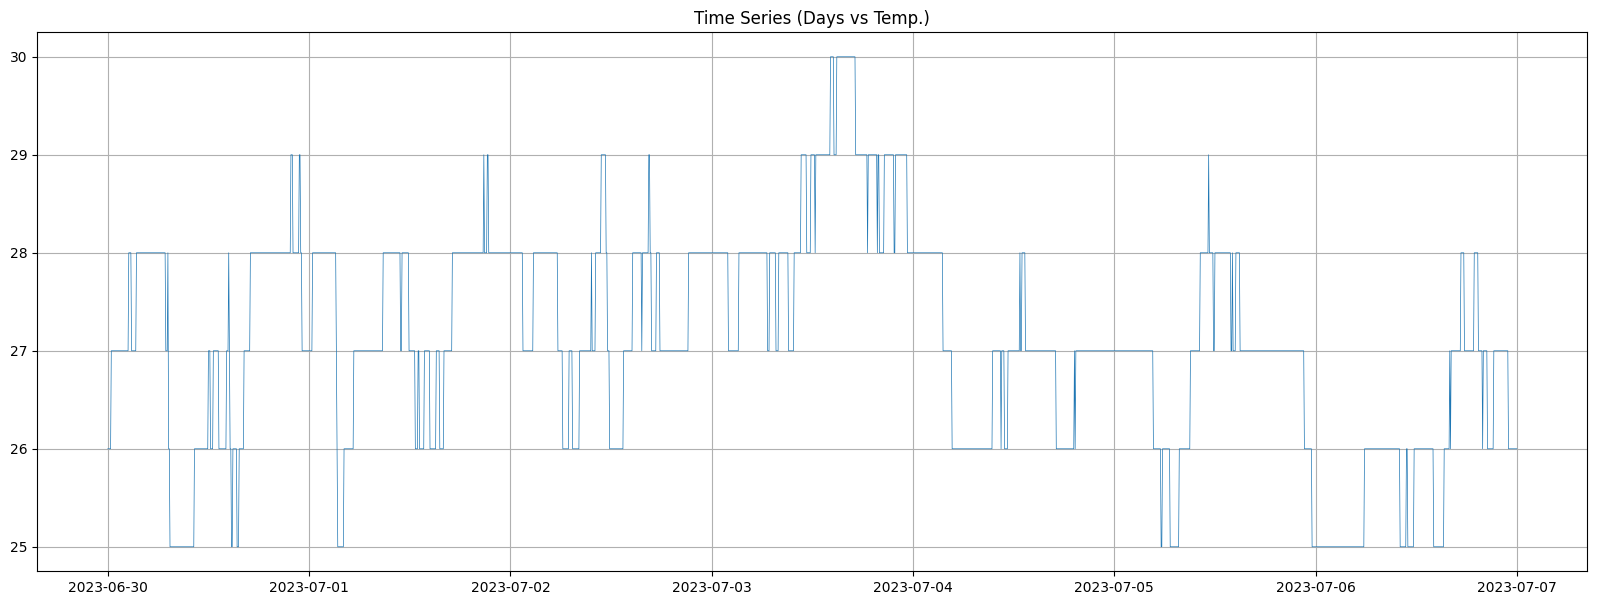

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Days vs Temp.)")
plt.show()

In [ ]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [ ]:
data_scaled

array([[-0.6],
       [-0.6],
       [-0.6],
       ...,
       [-0.6],
       [-0.6],
       [-0.6]])

In [ ]:
data_scaled.shape

(2017, 1)

In [ ]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [ ]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [ ]:
k = 1400
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]
Ytrain = Y[:k]
Ytest= Y[k:]

In [ ]:
X.shape

(1987, 30, 1)

In [ ]:
Xtrain.shape

(1400, 30, 1)

In [ ]:
Xtest.shape

(587, 30, 1)

In [ ]:
Ytrain.shape

(1400, 1)

In [ ]:
Ytest.shape

(587, 1)

In [ ]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

Epoch 1/300
44/44 [==============================] - 17s 95ms/step - loss: 0.0635
Epoch 2/300
44/44 [==============================] - 4s 101ms/step - loss: 0.0202
Epoch 3/300
44/44 [==============================] - 4s 84ms/step - loss: 0.0160
Epoch 4/300
44/44 [==============================] - 4s 82ms/step - loss: 0.0160
Epoch 5/300
44/44 [==============================] - 5s 114ms/step - loss: 0.0173
Epoch 6/300
44/44 [==============================] - 4s 83ms/step - loss: 0.0162
Epoch 7/300
44/44 [==============================] - 4s 83ms/step - loss: 0.0171
Epoch 8/300
44/44 [==============================] - 5s 111ms/step - loss: 0.0158
Epoch 9/300
44/44 [==============================] - 4s 82ms/step - loss: 0.0136
Epoch 10/300
44/44 [==============================] - 4s 81ms/step - loss: 0.0147
Epoch 11/300
44/44 [==============================] - 5s 105ms/step - loss: 0.0144
Epoch 12/300
44/44 [==============================] - 4s 88ms/step - loss: 0.0137
Epoch 13/300
44/44 [

In [ ]:
model.save("model_trained_temp.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


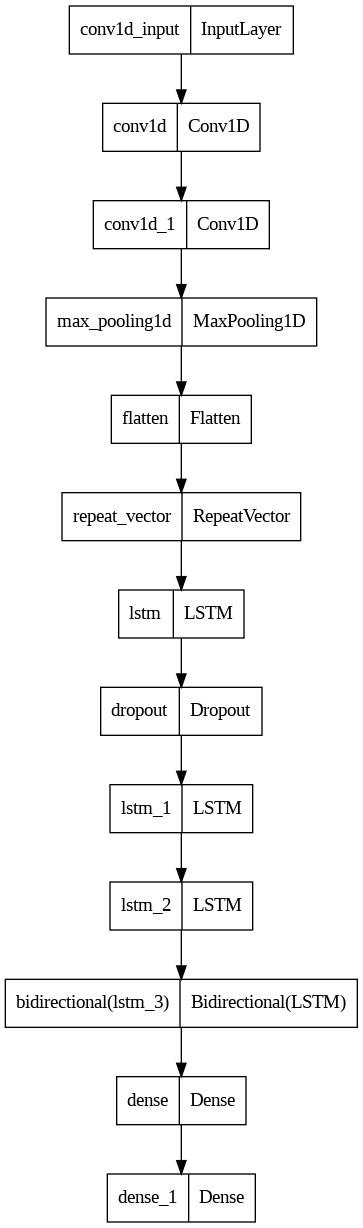

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 256)           768       
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           65664     
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 128)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 1792)          0         
 r)                                                              
                                                                 
 lstm (LSTM)                 (None, 30, 100)           7

In [ ]:
predict = model.predict(Xtest)

19/19 [==============================] - 2s 19ms/step


In [ ]:
predict = scalar.inverse_transform(predict)

In [ ]:
Ytesting = scalar.inverse_transform(Ytest)

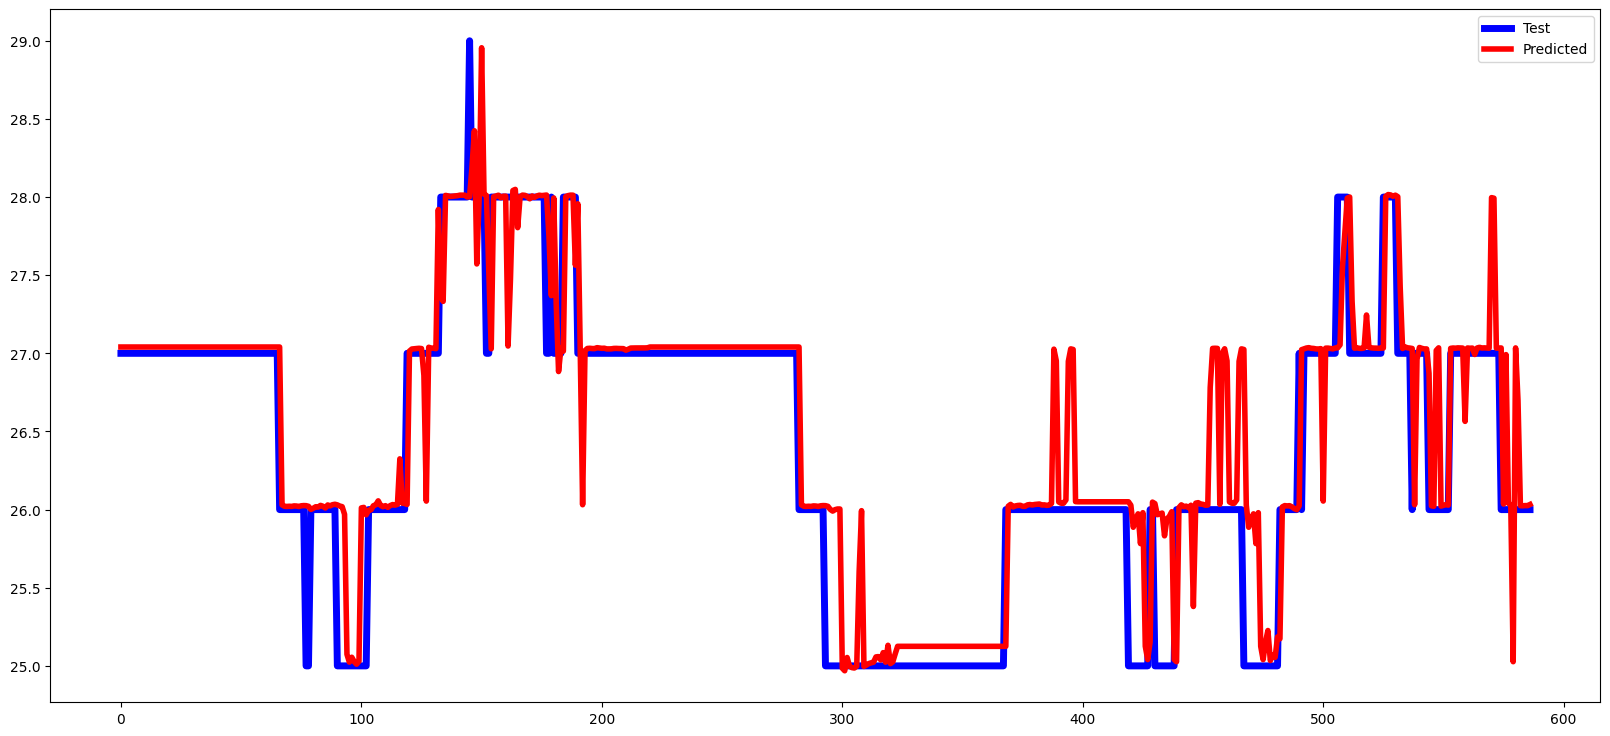

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Ytesting, predict)
print(f'MSE: {mse}')

MSE: 0.16489985065149693


In [ ]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Ytesting, predict)
print(f'MAE: {mae}')

MAE: 0.2051075670544496


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Ytesting, predict)
print(f'R-squared: {r2}')

R-squared: 0.8108983371413597


# Convert the model to TensorFlow Lite format

In [ ]:
import tensorflow as tf

# Load or define your TensorFlow/Keras model
model = tf.keras.models.load_model('model_trained_temp.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True  # Enable the new converter
converter._experimental_lower_tensor_list_ops = False  # Disable lowering tensor list ops
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('converted_temp_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# !pip install tensorflow-gpu==2.12.0

In [ ]:
# import tensorflow as tf


In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.experimental_new_converter = False  # Disable experimental converter
# converter.target_spec.supported_ops = [
#     tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
#     tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
# ]
# tflite_model = converter.convert()

In [ ]:
# Calculate residuals
residuals = Ytesting - predict

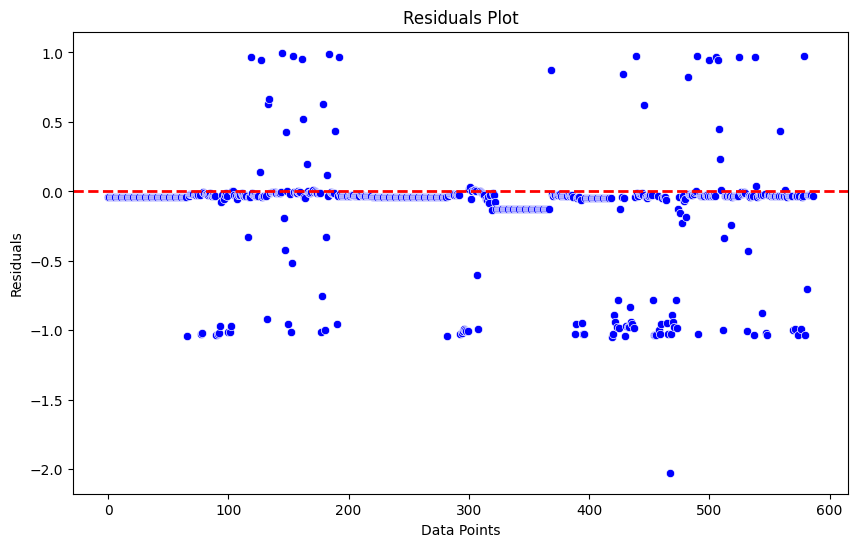

In [ ]:
# it ensures that residuals_flat is a one-dimensional array suitable for the scatter plot
residuals_flat = residuals.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(residuals_flat)), y=residuals_flat, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.show()

# This plot shows the differences between actual and predicted values for each data point. Points above the red dashed line indicate overpredictions, and points below indicate underpredictions.

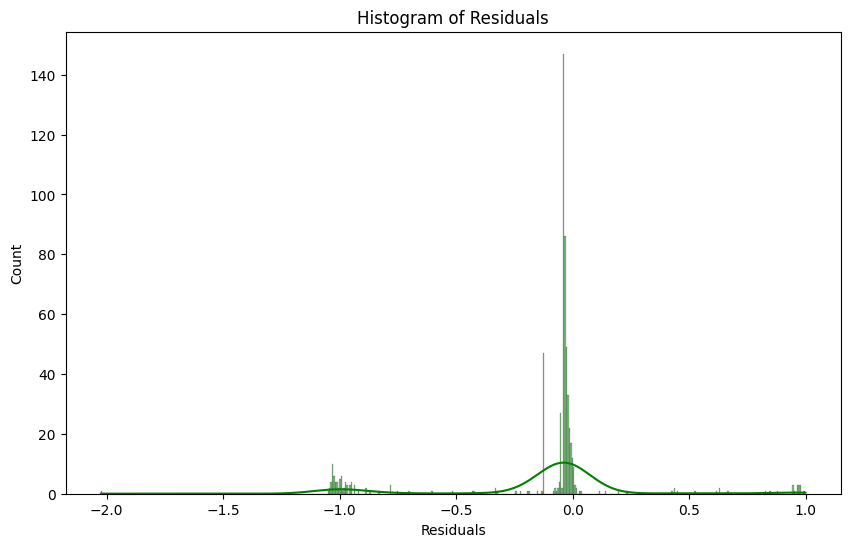

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_flat, kde=True, color='green')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# This plot provides a distribution of the residuals. A symmetric and centered distribution around zero is generally desirable.

In [ ]:
# import tensorflow as tf

# # Load or define your TensorFlow/Keras model
# model = tf.keras.models.load_model('regressor.hdf5')

# # Convert the model to TensorFlow Lite format
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.experimental_new_converter = True  # Enable the new converter
# converter._experimental_lower_tensor_list_ops = False  # Disable lowering tensor list ops
# tflite_model = converter.convert()

# # Save the TensorFlow Lite model to a file
# with open('my_model.tflite', 'wb') as f:
#     f.write(tflite_model)


In [ ]:
# # Copy the file to your Google Drive
# !cp regressor.hdf5 /content/drive/MyDrive/data/

In [ ]:
# !ls /content/drive/MyDrive/data


# Forecasting Humidity

In [ ]:
# taking only humidity feature as values and datetime feature as index in the dataframe for time series forecasting of humidity
data1 = pd.DataFrame(list(df['Hum - %']), index=df['Date & Time'], columns=['humidity'])

In [ ]:
data1

,humidity
Date & Time,
2023-06-30 00:00:00,87
2023-06-30 00:05:00,86
2023-06-30 00:10:00,86
2023-06-30 00:15:00,87
2023-06-30 00:20:00,87
...,...
2023-07-06 23:40:00,91
2023-07-06 23:45:00,91
2023-07-06 23:50:00,91


In [ ]:
data1.humidity.isna().sum()

0

In [ ]:
data1.fillna(data1['humidity'].mean(), inplace=True)

In [ ]:
data1.shape

(2017, 1)

In [ ]:
data1

,humidity
Date & Time,
2023-06-30 00:00:00,87
2023-06-30 00:05:00,86
2023-06-30 00:10:00,86
2023-06-30 00:15:00,87
2023-06-30 00:20:00,87
...,...
2023-07-06 23:40:00,91
2023-07-06 23:45:00,91
2023-07-06 23:50:00,91


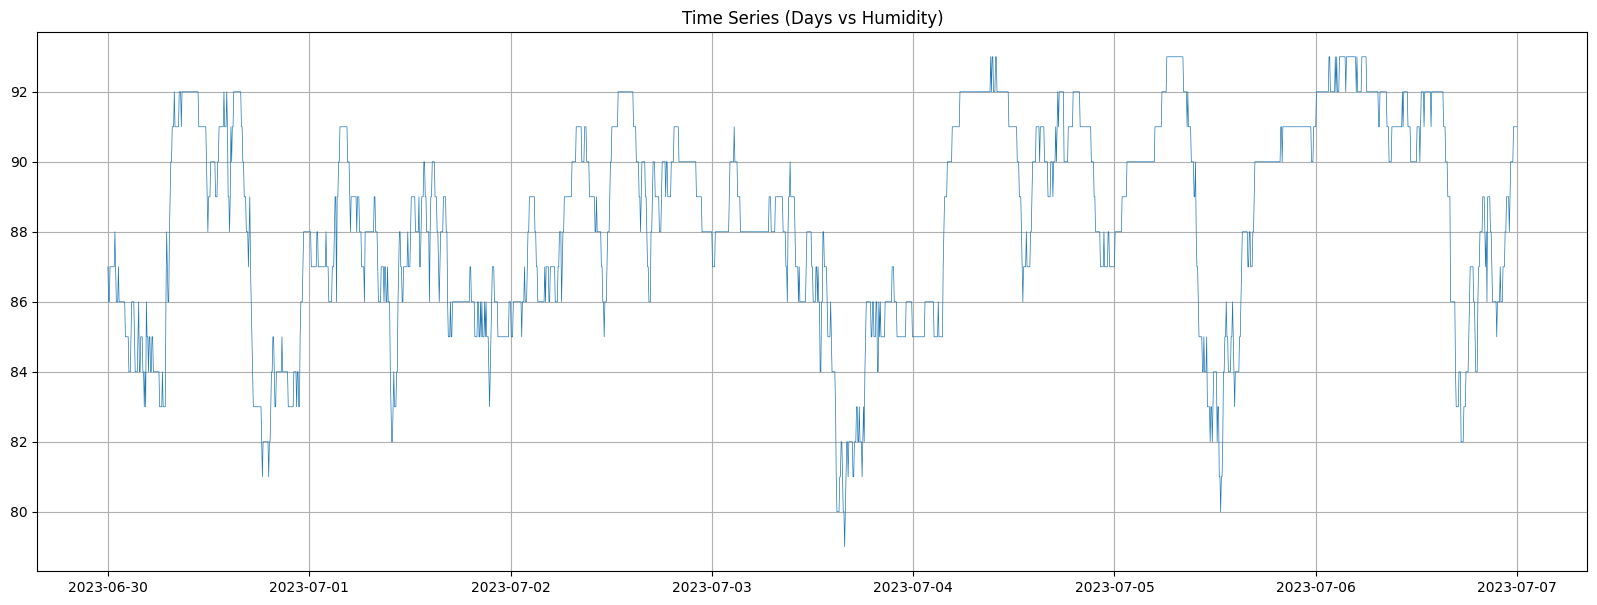

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(data1, linewidth=.5)
plt.grid()
plt.title("Time Series (Days vs Humidity)")
plt.show()

In [ ]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data1)

In [ ]:
data_scaled

array([[0.14285714],
       [0.        ],
       [0.        ],
       ...,
       [0.71428571],
       [0.71428571],
       [0.71428571]])

In [ ]:
data_scaled.shape

(2017, 1)

In [ ]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [ ]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [ ]:
k = 1400
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]
Ytrain = Y[:k]
Ytest= Y[k:]

In [ ]:
X.shape

(1987, 30, 1)

In [ ]:
Xtrain.shape

(1400, 30, 1)

In [ ]:
Xtest.shape

(587, 30, 1)

In [ ]:
Ytrain.shape

(1400, 1)

In [ ]:
Ytest.shape

(587, 1)

In [ ]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

Epoch 1/300
44/44 [==============================] - 13s 115ms/step - loss: 0.0477
Epoch 2/300
44/44 [==============================] - 4s 90ms/step - loss: 0.0140
Epoch 3/300
44/44 [==============================] - 4s 84ms/step - loss: 0.0097
Epoch 4/300
44/44 [==============================] - 4s 102ms/step - loss: 0.0090
Epoch 5/300
44/44 [==============================] - 4s 100ms/step - loss: 0.0093
Epoch 6/300
44/44 [==============================] - 4s 86ms/step - loss: 0.0084
Epoch 7/300
44/44 [==============================] - 4s 94ms/step - loss: 0.0087
Epoch 8/300
44/44 [==============================] - 5s 122ms/step - loss: 0.0092
Epoch 9/300
44/44 [==============================] - 10s 222ms/step - loss: 0.0073
Epoch 10/300
44/44 [==============================] - 9s 193ms/step - loss: 0.0073
Epoch 11/300
44/44 [==============================] - 5s 110ms/step - loss: 0.0077
Epoch 12/300
44/44 [==============================] - 4s 93ms/step - loss: 0.0070
Epoch 13/300
44/

In [ ]:
model.save("model_trained_humi.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


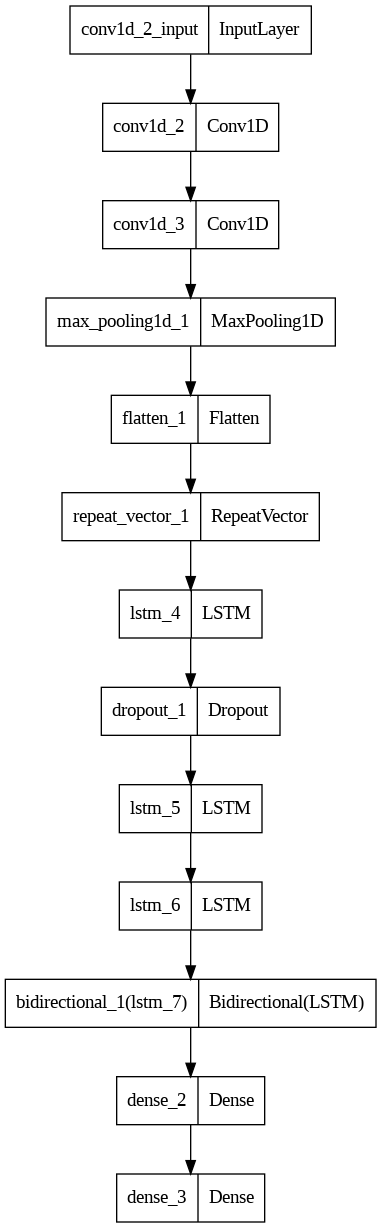

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
predict = model.predict(Xtest)

19/19 [==============================] - 1s 13ms/step


In [ ]:
predict = scalar.inverse_transform(predict)

In [ ]:
Ytesting = scalar.inverse_transform(Ytest)

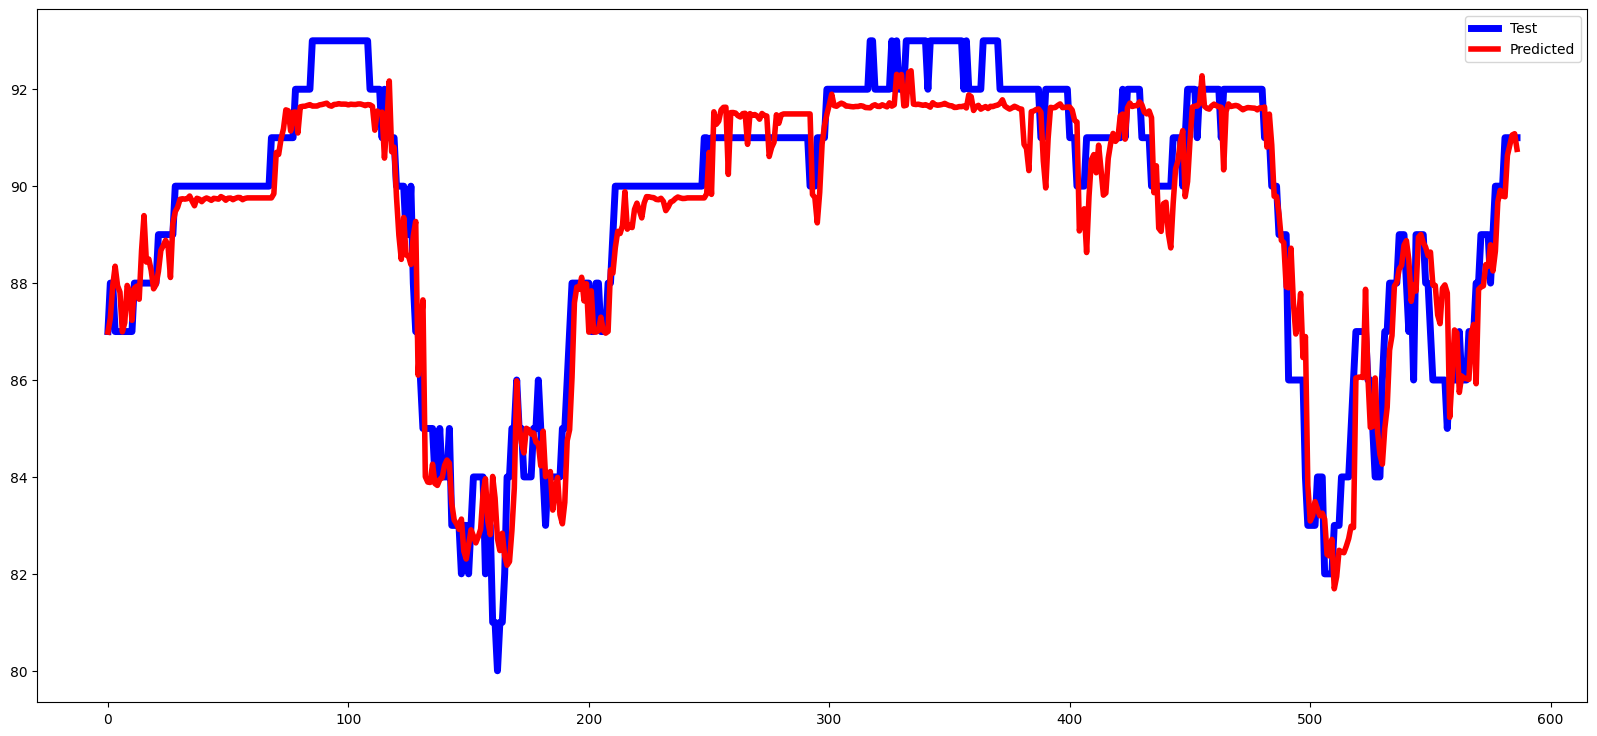

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Ytesting, predict)
print(f'MSE: {mse}')

MSE: 0.793491696827415


In [ ]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Ytesting, predict)
print(f'MAE: {mae}')

MAE: 0.6890479742566812


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Ytesting, predict)
print(f'R-squared: {r2}')

R-squared: 0.9118370135591483


In [ ]:
import tensorflow as tf

# Load or define your TensorFlow/Keras model
model = tf.keras.models.load_model('model_trained_humi.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True  # Enable the new converter
converter._experimental_lower_tensor_list_ops = False  # Disable lowering tensor list ops
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('converted_humi_model.tflite', 'wb') as f:
    f.write(tflite_model)


# Forecasting Wind Speed

In [ ]:
# taking only wind speed feature as values and datetime feature as index in the dataframe for time series forecasting of wind speed
data2 = pd.DataFrame(list(df['Avg Wind Speed - km/h']), index=df['Date & Time'], columns=['windspeed'])

In [ ]:
data2

,windspeed
Date & Time,
2023-06-30 00:00:00,17
2023-06-30 00:05:00,16
2023-06-30 00:10:00,9
2023-06-30 00:15:00,13
2023-06-30 00:20:00,11
...,...
2023-07-06 23:40:00,16
2023-07-06 23:45:00,17
2023-07-06 23:50:00,12


In [ ]:
data2.windspeed.isna().sum()

0

In [ ]:
data2.fillna(data2['windspeed'].mean(), inplace=True)

In [ ]:
data2.shape

(2017, 1)

In [ ]:
data2

,windspeed
Date & Time,
2023-06-30 00:00:00,17
2023-06-30 00:05:00,16
2023-06-30 00:10:00,9
2023-06-30 00:15:00,13
2023-06-30 00:20:00,11
...,...
2023-07-06 23:40:00,16
2023-07-06 23:45:00,17
2023-07-06 23:50:00,12


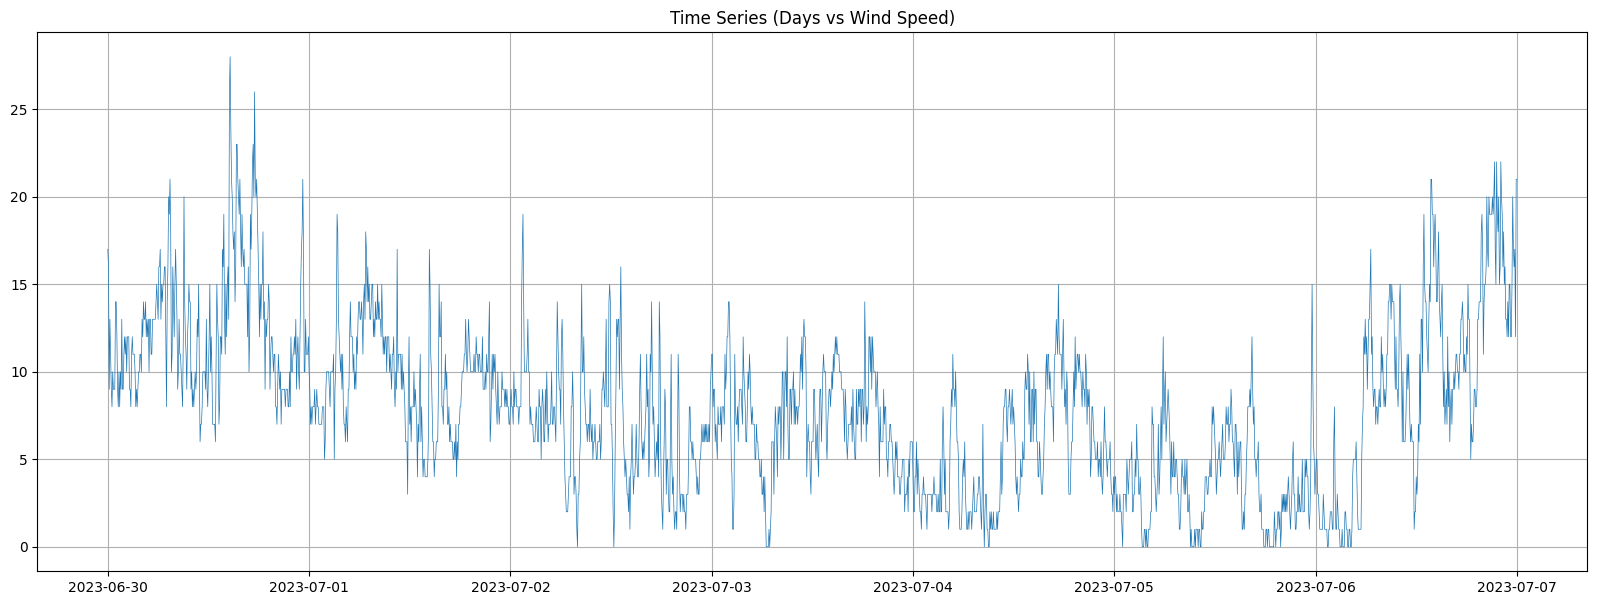

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(data2, linewidth=.5)
plt.grid()
plt.title("Time Series (Days vs Wind Speed)")
plt.show()

In [ ]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data2)

In [ ]:
data_scaled

array([[ 0.21428571],
       [ 0.14285714],
       [-0.35714286],
       ...,
       [-0.14285714],
       [ 0.5       ],
       [ 0.5       ]])

In [ ]:
data_scaled.shape

(2017, 1)

In [ ]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [ ]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [ ]:
k = 1400
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]
Ytrain = Y[:k]
Ytest= Y[k:]

In [ ]:
X.shape

(1987, 30, 1)

In [ ]:
Xtrain.shape

(1400, 30, 1)

In [ ]:
Xtest.shape

(587, 30, 1)

In [ ]:
Ytrain.shape

(1400, 1)

In [ ]:
Ytest.shape

(587, 1)

In [ ]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

Epoch 1/300
44/44 [==============================] - 12s 86ms/step - loss: 0.0608
Epoch 2/300
44/44 [==============================] - 4s 85ms/step - loss: 0.0306
Epoch 3/300
44/44 [==============================] - 5s 115ms/step - loss: 0.0276
Epoch 4/300
44/44 [==============================] - 4s 87ms/step - loss: 0.0236
Epoch 5/300
44/44 [==============================] - 4s 87ms/step - loss: 0.0231
Epoch 6/300
44/44 [==============================] - 5s 115ms/step - loss: 0.0237
Epoch 7/300
44/44 [==============================] - 4s 86ms/step - loss: 0.0232
Epoch 8/300
44/44 [==============================] - 4s 86ms/step - loss: 0.0270
Epoch 9/300
44/44 [==============================] - 5s 109ms/step - loss: 0.0236
Epoch 10/300
44/44 [==============================] - 4s 91ms/step - loss: 0.0218
Epoch 11/300
44/44 [==============================] - 4s 89ms/step - loss: 0.0204
Epoch 12/300
44/44 [==============================] - 5s 106ms/step - loss: 0.0204
Epoch 13/300
44/44 [

In [ ]:
model.save("model_trained_wind.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("windspeed1.h5")

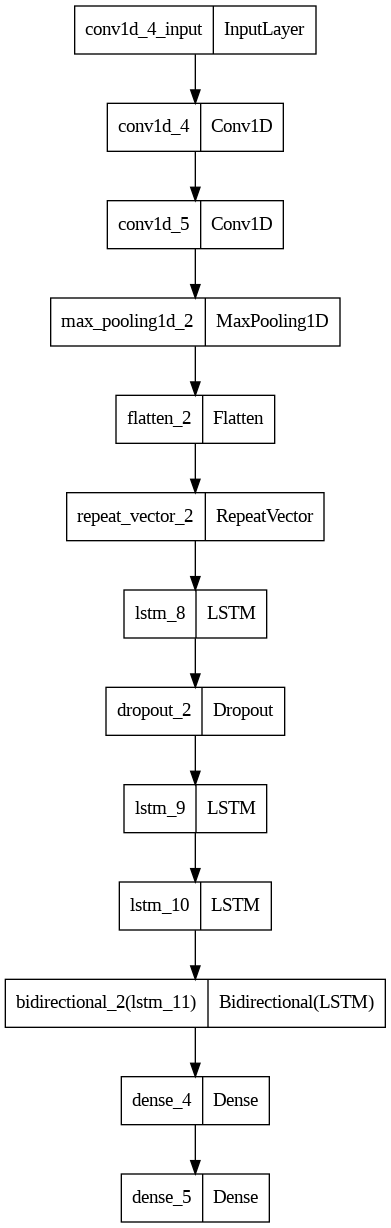

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
predict = model.predict(Xtest)

19/19 [==============================] - 2s 20ms/step


In [ ]:
predict = scalar.inverse_transform(predict)

In [ ]:
Ytesting = scalar.inverse_transform(Ytest)

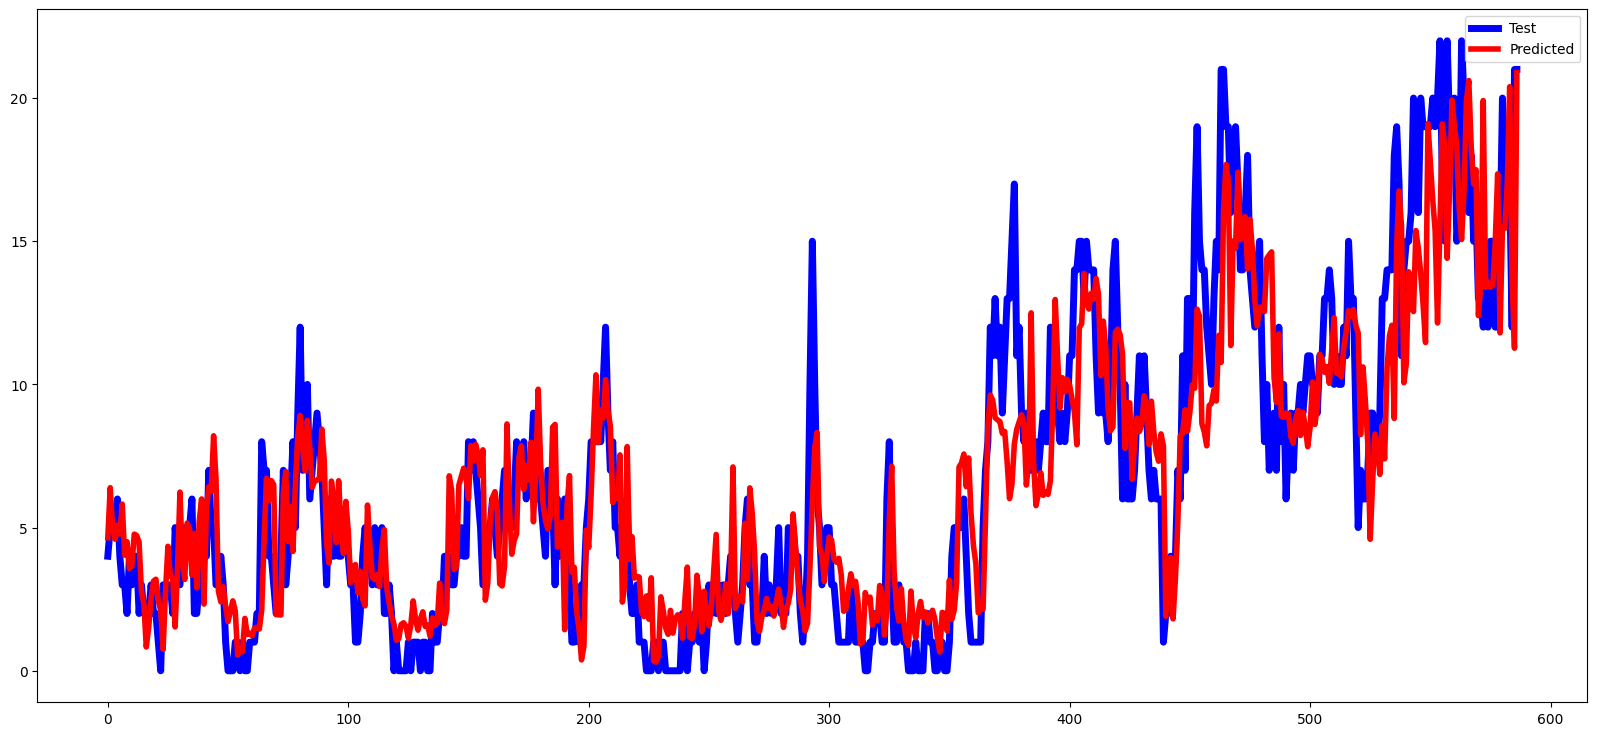

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Ytesting, predict)
print(f'MSE: {mse}')

MSE: 6.659919404042234


In [ ]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Ytesting, predict)
print(f'MAE: {mae}')

MAE: 1.9284584491784975


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Ytesting, predict)
print(f'R-squared: {r2}')

R-squared: 0.7742185299725528


In [ ]:
import tensorflow as tf

# Load or define your TensorFlow/Keras model
model = tf.keras.models.load_model('model_trained_wind.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True  # Enable the new converter
converter._experimental_lower_tensor_list_ops = False  # Disable lowering tensor list ops
tflite_model = converter.convert()

#  Save the TensorFlow Lite model to a .tflite file
with open('converted_wind_model.tflite', 'wb') as f:
    f.write(tflite_model)